In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = np.genfromtxt("Salary_Data.csv", delimiter = ",")
data

array([[        nan,         nan],
       [1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00,

In [69]:
data = data[1:,:]

In [70]:
data

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [71]:
x = data[:,0]
x.shape

(30,)

In [72]:
y = data[:,1]
y_pred = None
y.shape

(30,)

In [73]:
def error(m_current, b_current, x, y):
    total_error = 0
    for i in range(len(x)):
        total_error += (y[i] - (m_current * x[i] + b_current)) ** 2
    return (total_error // (2 * len(x))) 

In [74]:
def step_gradient(m , b, x, y, learning_rate):
    m_gradient = 0
    b_gradient = 0
    le = len(x)
    for i in range(len(x)):
        b_gradient += -1/le * (y[i] - (m * x[i] + b))
        m_gradient += -1/le * (y[i] - (m * x[i] + b)) * x[i]
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient)
    return [new_m, new_b]

In [75]:
def gradient_descent_runner(m_current, b_current, x, y, learning_rate):
    m = m_current
    b = b_current
    for i in range(1,10001):
        m, b = step_gradient(m, b, x, y, learning_rate)
        if(1000%i == 0 and i % 100 == 0):
            print(m,"   ", b,"   ",error(m,b,x,y))
    return [m , b]

In [76]:
def run():
    m = 0
    b = 0
    toterror = 0
    learning_rate = 0.01
    m, b = gradient_descent_runner(m, b, x, y, learning_rate)
    y_pred = m*x +b
    print("predion after training:")
    for i in range(len(x)):
        print(m*x[i] + b , "         ", y[i])
    plt.scatter(x, y ,color = 'red')
    plt.plot(x, y_pred)
    plt.title("Salary vs Experience Model")
    plt.show()

12315.527430123682     6481.917498721375     55941133.0
11768.688493741762     10166.919951092654     42025778.0
10678.43927859623     17513.82004216668     23043109.0
9876.112752879602     22920.485548522254     16526873.0
predion after training:
36187.15873955563           39343.0
38077.15120429758           46205.0
39967.143669039535           37731.0
44692.12483089442           43525.0
46582.11729563638           39891.0
53197.09092223323           56642.0
54142.0871546042           60150.0
56032.07961934616           54445.0
56032.07961934616           64445.0
60757.06078120104           57189.0
62647.053245942996           63218.0
63592.04947831397           55794.0
63592.04947831397           56957.0
64537.04571068495           57081.0
68317.03064016886           61111.0
72097.01556965278           67938.0
73987.00803439473           66029.0
75877.00049913669           83088.0
81546.97789336255           81363.0
82491.97412573353           93940.0
90051.94398470136           917

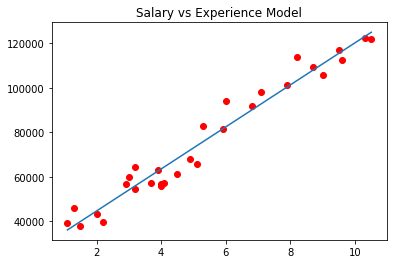

In [77]:
if __name__ == "__main__":
    run()